### 1. Import and data loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,white_castled,...,white_pawn_moves,black_pawn_moves,white_piece_moves,black_piece_moves,white_center_pawns,black_center_pawns,white_bishop_developed,black_bishop_developed,white_early_queen_out,black_early_queen_out
0,2504,2371,2,0,133,2437.5,1,133,0,1,...,5,5,4,4,2,2,1,1,0,0
1,2487,2596,1,0,109,2541.5,0,-109,0,1,...,4,6,5,3,2,1,1,1,0,0
2,2915,2921,1,0,6,2918.0,0,-6,0,1,...,4,5,5,4,2,1,1,1,0,0
3,2542,2433,2,0,109,2487.5,1,109,10,1,...,2,5,7,5,2,1,1,1,0,0
4,2473,2658,0,0,185,2565.5,0,-185,0,1,...,2,3,7,6,2,1,1,1,0,0


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3243955, 22)
Target: (3243955,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
dt_model = DecisionTreeClassifier(
    max_depth=20,              # Same as Random Forest for fair comparison
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [6]:
start_time = time.time()

dt_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 43.18 seconds (0.72 minutes)


### 5. Evaluate

In [7]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5725 (57.25%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.55      0.56      0.55    265868
        Draw       0.79      0.27      0.40     83919
   White Win       0.58      0.67      0.62    299004

    accuracy                           0.57    648791
   macro avg       0.64      0.50      0.52    648791
weighted avg       0.59      0.57      0.56    648791



### 6. Confusion Matrix

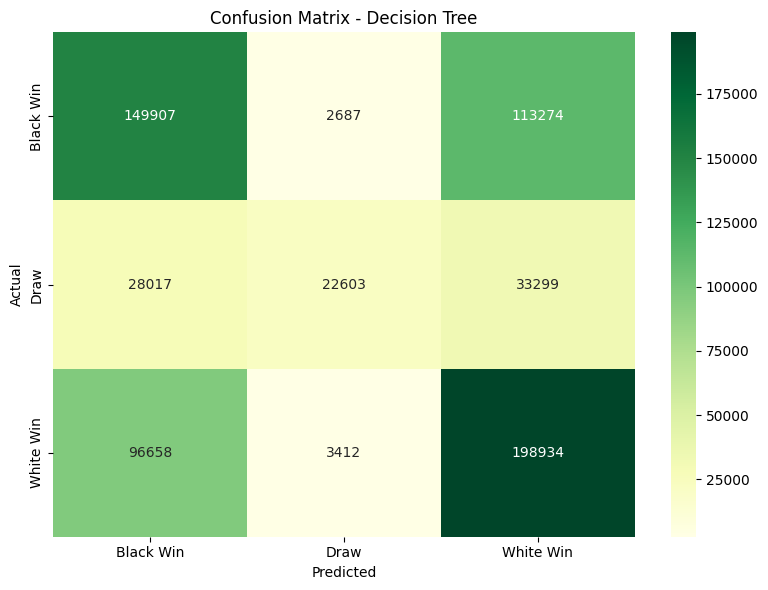

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

### 7. Feature Importance


Feature Importance:
                   Feature  Importance
6     WhiteRatingAdvantage    0.343147
4                AvgRating    0.331268
3               RatingDiff    0.113808
0                 WhiteElo    0.035893
1                 BlackElo    0.032572
2              EventTypeID    0.026146
7                    ECOID    0.018098
16      white_center_pawns    0.011509
13        black_pawn_moves    0.011322
12        white_pawn_moves    0.010926
14       white_piece_moves    0.010350
15       black_piece_moves    0.010323
17      black_center_pawns    0.009928
11          black_captures    0.008906
10          white_captures    0.008784
8            white_castled    0.004725
9            black_castled    0.004360
21   black_early_queen_out    0.002358
20   white_early_queen_out    0.002100
19  black_bishop_developed    0.001866
18  white_bishop_developed    0.001583
5       WhiteIsHigherRated    0.000027


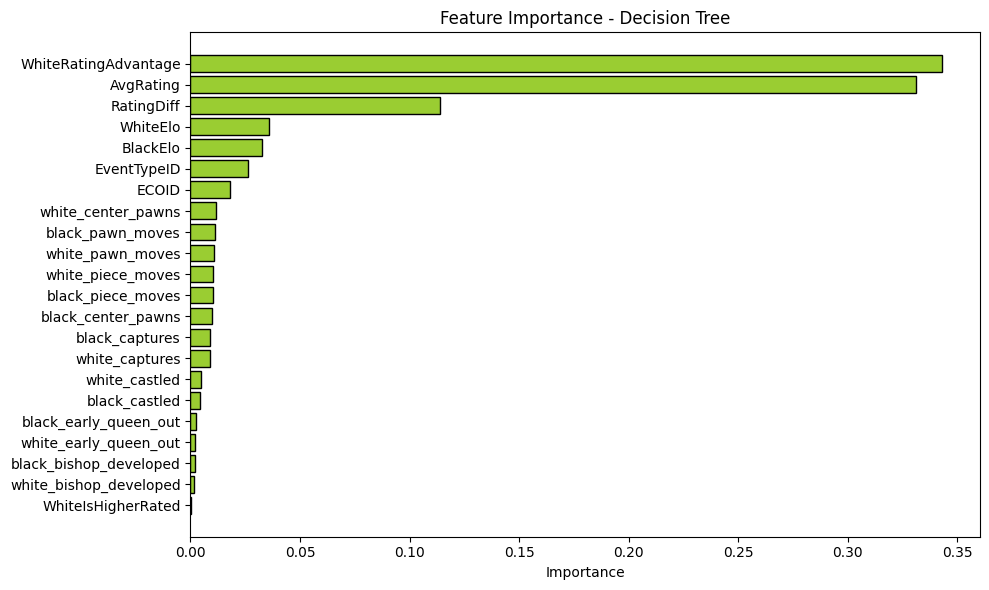

In [9]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],
         color='yellowgreen', edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()